In [24]:
from konlpy.tag import Okt
import os
import pandas as pd 
import numpy as np
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [25]:
print("JAVA_HOME" in os.environ)
#os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-19\bin\server'
#JAVA_HOME에 대한 환경변수가 제대로 설정되지 않은 것 

True


In [23]:
text = '진짜 에러찢기 너무 어렵네욬ㅋ ㅎㅎ'
okt = Okt()
okt.normalize(text)

'진짜 에러찢기 너무 어렵네요ㅋ ㅎㅎ'

In [31]:
data_path = "C:/Users/user/OneDrive/바탕 화면/Untitled Folder/ML_Melon_Project"
train = pd.read_json(data_path+'/train.json')
val = pd.read_json(data_path+'/val.json')

In [48]:
#태그와 곡이 없는 validation data 추출
val[(val['songs']+val['tags']).map(len)==0]

,tags,id,plylst_title,songs,like_cnt,updt_date
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000
9,[],142007,기분 좋은 재즈와 함께 만드는 달달한 하루,[],0,2015-06-22 09:11:02.000
35,[],65114,"■■■■ 사랑,그리고이별 ■■■■",[],6,2010-10-27 10:34:34.000
57,[],87700,마쉬멜로우같은 멜로우한 음악,[],6,2016-01-14 10:19:30.000
71,[],35271,공부와 독서를 위한 #Newage,[],10,2020-01-17 15:46:20.000
...,...,...,...,...,...,...
22903,[],140513,10년이 지나 들어도 좋은 감성 Ballad,[],405,2016-01-11 10:58:05.000
22920,[],124704,가사의 의미와 뜻은모른다!! 오직 멜로디로만 선곡한 팝송!!,[],27,2016-02-05 12:31:59.000
22981,[],13045,＊카페 느낌 샹송♭,[],38,2011-07-12 00:58:39.000
22991,[],32537,컨트리 황제 조니 캐시가 선 레코드 시절 발표한 초기 대표작,[],28,2019-06-17 14:22:48.000


In [269]:
import json
import re
from collections import Counter
from typing import *

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
import numpy as np
import pandas as pd
from konlpy.tag import Komoran, Okt

In [279]:
def re_sub(series: pd.Series):
    series = series.str.replace(pat=r'[ㄱ-ㅎ]',repl=r'',regex=True)
    series = series.str.replace(pat=r'[^\w\s]',repl=r'',regex=True)
    series = series.str.replace(pat=r'[ ]{2,}',repl=r' ',regex=True)
    series = series.str.replace(pat=r'[\u3000]+',repl=r'',regex=True)
    return series

def flatten(list_of_list : List):
    flatten = [j for i in list_of_list for j in i] #밖에꺼까고 안에꺼까고
    return flatten

def get_token(title: str, tokenizer):
    if len(title) == 0 or title== ' ':
        return []
    result = tokenizer.pos(title)
    return result
def get_all_tags(df):
    tag_list = df['tags'].values.tolist()
    tag_list = flatten(tag_list)
    return tag_list

In [123]:
tokenizer = Komoran()
all_tag = get_all_tags(train)

In [145]:
token_tag = [get_token(x,tokenizer) for x in all_tag]

In [170]:
token_itself = list(filter(lambda x : len(x)==1,token_tag))
token_itself = flatten(token_itself)
flatten_token = flatten(token_tag)

In [247]:
print('%-23s'%'# of original tag is', f'{len(all_tag):10,}')
print('%-23s'%'# of morpheme itself is', f'{len(flatten_token):10,}')
print('%-23s'%'# of total token is', f'{len(token_itself):10,}')

# of original tag is       476,331
# of morpheme itself is    733,087
# of total token is        321,322


In [254]:
pos = [x[1] for x in token_itself]
pos_count = Counter(pos)
popular_pos = pos_count.most_common()

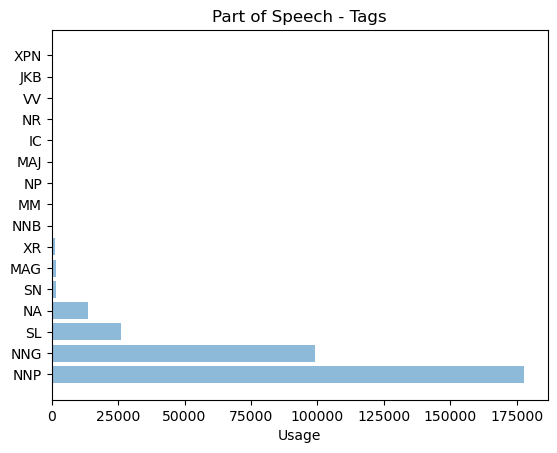

In [273]:
objects = [x[0] for x in popular_pos]
y_pos = np.arange(len(objects))
performance  = [x[1] for x in popular_pos]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Part of Speech - Tags')

plt.show()

### 플레이리스트 제목으로 형태소 분석

In [284]:
train['plylst_title'] = re_sub(train['plylst_title'])
train.loc[:, 'ply_token'] = train['plylst_title'].map(lambda x : get_token(x,tokenizer))

In [286]:
lambda x: list(filter(lambda x: x[1] in using_pos, x))

<function __main__.<lambda>(x)>

In [299]:
using_pos = ['NNG','SL','NNP','MAG','SN']  # 일반 명사, 외국어, 고유 명사, 일반 부사, 숫자
train['ply_token']=train['ply_token'].map(lambda x : list(filter(lambda x: x[1] in using_pos,x)))
#첫번째 lambda는 using_pos의 품사로만 필터링을 수행하고 
#두번째 lambda는 해당 필터를 ply_token에 적용하는것이다

In [307]:
unique_token = set(token_itself)

In [313]:
unique_word = [x[0] for x in unique_token]
train['ply_token'].map(lambda x : list(filter(lambda x: x[0] in unique_word,x)))


0                                    [(여행, NNG), (음악, NNG)]
1                                     [(요즘, NNG), (말, NNG)]
2                                                [(곡, NNG)]
3                     [(크리스마스, NNP), (분위기, NNG), (흠뻑, MAG)]
4                                    [(추억, NNP), (노래, NNG)]
                                ...                        
115066                                            [(2, SN)]
115067    [(따끈따끈, MAG), (최신, NNG), (인기, NNG), (EDM, SL),...
115068                     [(1, SN), (눈물, NNG), (이야기, NNP)]
115069        [(퇴근, NNG), (버스, NNG), (하루, NNG), (마무리, NNG)]
115070                                                   []
Name: ply_token, Length: 115071, dtype: object